# Project: Investigate a Dataset - [Database_TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Below is the column Discription

| Column | Datatype | Discription |
| --- | --- | --- |
| id                    |  int64    | A unique number for each movie
| imdb_id               |  String   | A unique number for each movie w.r.t  imdb
| popularity            |  float64  | Number defines how popular the movie is
| budget                |  int64    | Expendure spent on the movie
| revenue               |  int64    | Revenue collected for the movie
| original_title        |  String   | Movie Title
| cast                  |  String   | Cast in the movie separated by "\|"
| homepage              |  String   | Website of the movie
| director              |  String   | Name of the Director separated by "\|"
| tagline               |  String   | Movie tagline
| keywords              |  String   | Words to describe the movie
| overview              |  String   | Description of the movie
| runtime               |  int64    | Movie time in minutes
| genres                |  String   | Movie Type separated by "\|"
| production_companies  |  String   | Name of the Production
| release_date          |  String   | Release Date
| vote_count            |  int64    | Total Vote count
| vote_average          |  float64  | Average vote
| release_year          |  int64    | Release year
| budget_adj            |  float64  | Adjusted budget for inflation over time
| revenue_adj           |  float64  | Adjusted Revenue for inflation over time


### Question(s) for Analysis
#### 1. What make a movie popular ?

    1.1 What are the top 15 popular movie names ?
    1.2 Dose budget influence polularity ?    
    1.3 Dose polularity movies earn more profits ?    
    1.4 Dose runtime influence polularity ?    
    1.5 Which genres tend to be more popular ?    
    
#### 2. Changes in trends from year to year?

    2.1 How much money they spend on movies year wise ?    
    2.2 Are new movies popular than old movies ?    
    2.3 Is there any change in Runtime year wise ?    
    2.4 Any Changes in total genres count year wise ?        

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
df=pd.read_csv("Database_TMDb_movie_data//tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

### Step 1 : Drop columns which are not required to answers our questions

Below columns are droped

| Column | Reason for drop |
| --- | --- |
| imdb_id | We already have a unique id column called "id" |
| homepage | The count is too low |
| tagline | Dosent help to answer our questions |
| keywords | Dosent help to answer our questions |
| overview | Dosent help to answer our questions |
| budget_adj | Dosent help to answer our questions |
| revenue_adj | Dosent help to answer our questions |

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [90]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'],axis=1,inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


### Step2 : Deal with Null values 

| Column | Null count |
| --- | --- |
| cast | 76 |
| director | 44 |
| genres | 23 |
| production_companies | 1030 |



1. Should we reomve rows having null ?
> If we remove , then we will end up having less data

2. By filing the nulls Is there impact to solve our question ?
> No , as all the null columns are non-numeric

3. what to replace the nulls with ?
> As the colums are string , we will replace them with "NULL"



In [92]:
df['cast'].fillna("Null",inplace=True)
df['director'].fillna("Null",inplace=True)
df['genres'].fillna("Null",inplace=True)
df['production_companies'].fillna("Null",inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


### Step3 : Deal with value 0 in some colums

| Column | 0 Value count |
| --- | --- |
| runtime | 31 |
| budget | 5696 |
| revenue | 6016 |


1. Should we reomve rows having value 0 ?
> If we remove , then we will end up having less data

2. By filing the nulls Is there impact to solve our question ?
> Yes ,There colums are numeric and there is impact as we are artificially filling data

3. what to replace the nulls with ?
> Better to replace them with there mean value 

In [94]:
#If we just perform mean , the formula will include count values with 0 , which is incorrect 

runtime_actual_mean = df['runtime'].sum() / df[df['runtime'] != 0]['runtime'].count()
budget_actual_mean = df['budget'].sum() / df[df['budget'] != 0]['budget'].count()
revenue_actual_mean = df['revenue'].sum() / df[df['revenue'] != 0]['revenue'].count()

In [95]:
# Replace value 0 with its proper mean value 

runtime_column = df['runtime']
runtime_column.replace(to_replace = 0, value = runtime_actual_mean, inplace=True)
budget_column = df['budget']
budget_column.replace(to_replace = 0, value = budget_actual_mean, inplace=True)
revenue_column = df['revenue']
revenue_column.replace(to_replace = 0, value = revenue_actual_mean, inplace=True)

### Step3 : Check for duplicates

1. Which columns are primary key ?
> "id" is our primary key column

In [96]:
# Check if there is any repeating id in 'id' column 

df['id'].count() - df['id'].nunique()

1

In [97]:
df[df['id'].duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [98]:
df[df['id'] == 42194]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
2090,42194,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [99]:
df.drop(2090,axis=0,inplace=True)

In [100]:
df['id'].count() - df['id'].nunique()

0

### Step 4 :Feature Engineering 

1. Update Id column so count starts from 1
2. Add new column profit = revenue - budget
3. Expand the Popularity column for better understanding    

In [101]:
# Update Id column so count starts from 1
df.update(pd.DataFrame({'id': list(range(1,len(df)+2))}))

In [102]:
df['id'].describe()

count    10865.000000
mean      5433.807639
std       3136.868785
min          1.000000
25%       2718.000000
50%       5434.000000
75%       8150.000000
max      10866.000000
Name: id, dtype: float64

In [103]:
# Add new column profit = revenue - budget

df = df.assign(profit = lambda x: (x['revenue'] - x['budget']))

In [104]:
df.columns.tolist()

['id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'profit']

In [105]:
df = df[['id','popularity','budget','revenue','profit','original_title','cast',
 'director','runtime','genres','production_companies','release_date',
'vote_count','vote_average','release_year']]

In [106]:
# Expand the Popularity column for better understanding
df['popularity'] = df['popularity']*50

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




### Question 1 : 
### What make a movie popular ?

In [107]:
# This will help to control the size of the plot within the notebook
plt.rcParams["figure.figsize"] = (8,6)

In [108]:
df['popularity'].describe()

count    10865.000000
mean        32.322278
std         50.011543
min          0.003250
25%         10.378750
50%         19.191550
75%         35.692850
max       1649.288150
Name: popularity, dtype: float64

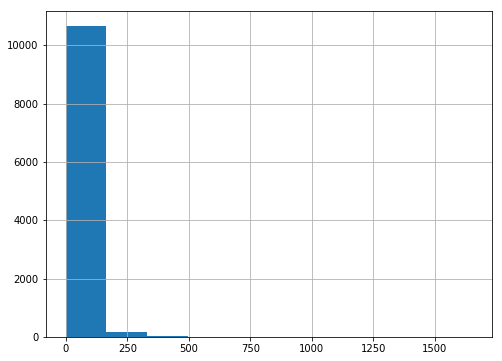

In [109]:
df['popularity'].hist()

##### conclusion from above
##### From above observation its clear that Most of the popularity data lies between 0 to 200

#### Question 1.1 
#### What are the top 15 popular movie names ?

In [110]:
df_top15_pop = df.nlargest(n=15, columns=['popularity'])

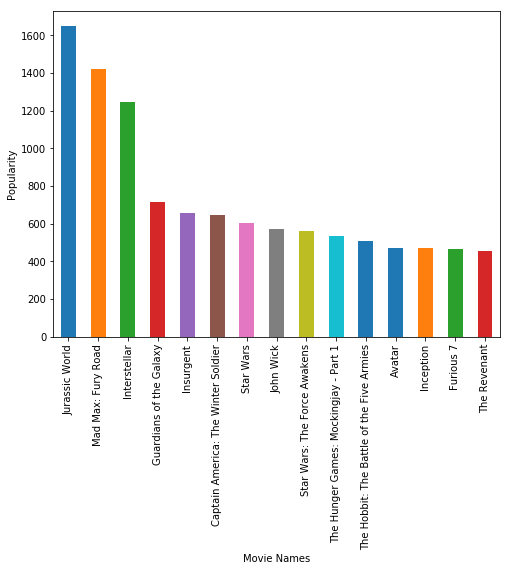

In [111]:
x = df_top15_pop["original_title"]
y = df_top15_pop['popularity'].plot(kind='bar')
plt.xlabel("Movie Names")
plt.ylabel("Popularity")
plt.xticks(range(len(x)), x)
plt.show()

#### Question 1.2
#### Dose budget influence polularity ?

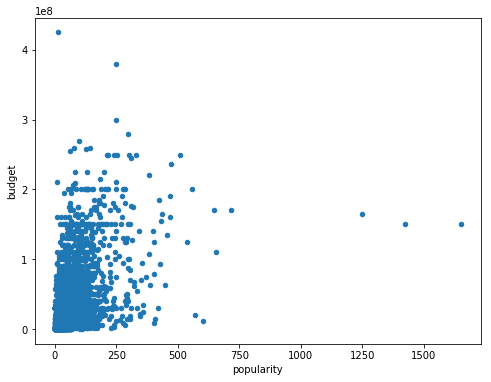

In [112]:
df.plot(x='popularity',y='budget',kind='scatter')

##### conclusion from above
##### To understand the relation better temporarily we will remove all popularity > 250

In [113]:
df_edit = df.drop(df[df['popularity'] > 250].index)

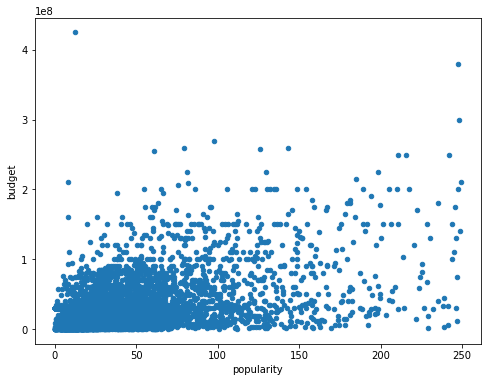

In [114]:
df_edit.plot(x='popularity',y='budget',kind='scatter')

##### conclusion from above
##### There is very slight positive direct relation between budget and popularity

####  Question 1.3
####  Dose polularity movies earn more profits ?

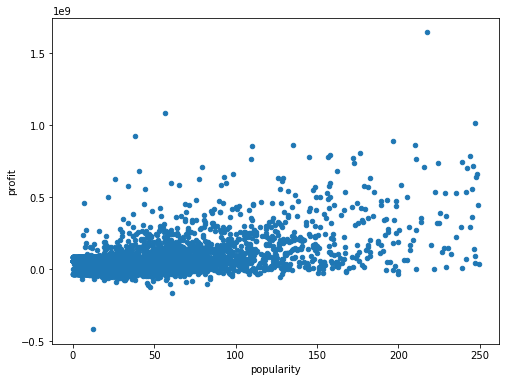

In [115]:
df_edit.plot(x='popularity',y='profit',kind='scatter')

##### conclusion from above
##### Ya , Popular moview tend to earn more profit

#### Question 1.4
####  Dose runtime influence polularity ?

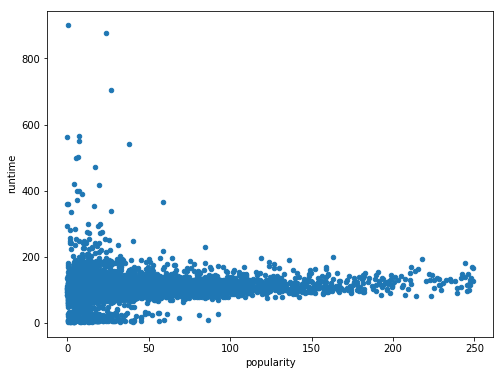

In [116]:
df_edit.plot(x='popularity',y='runtime',kind='scatter')

##### conclusion from above
##### Most popular movies are between 100 to 150 minutes 

#### Question 1.5
#### Which genres tend to be more popular ?

In [117]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

##### To make it simpler we will pickup the first genres as the main one

In [118]:
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [119]:
df_temp = df.groupby(['genres'], as_index=False)['popularity'].mean()
df_temp.sort_values(by=['popularity'],ascending=False,inplace=True)

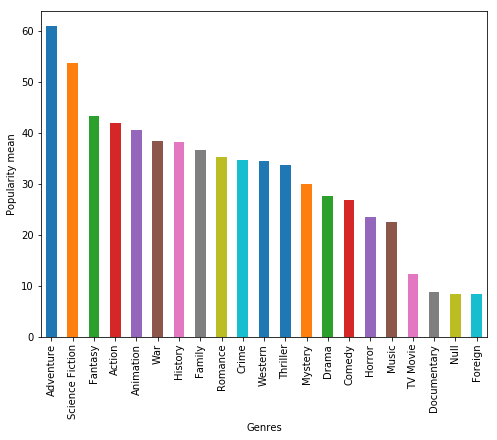

In [120]:
x = df_temp["genres"]
y = df_temp['popularity'].plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Popularity mean")
plt.xticks(range(len(x)), x)
plt.show()

##### conclusion from above
##### Adventure , Science Fiction , Fantasy , Action , Animation are the top 5 Genres which have top 5 populatity

### Question 2  :
### Changes in trends from year to year?

In [121]:
df['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

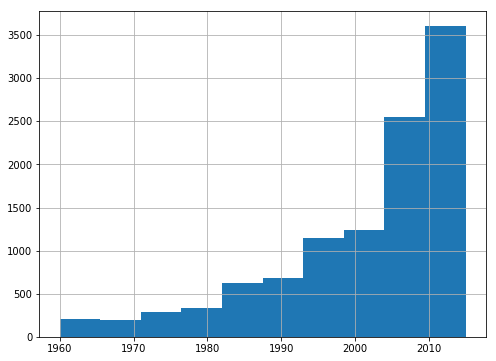

In [122]:
df['release_year'].hist()

##### conclusion from above
##### Many movies in this Dataset are in between 2005-2015

#### Question 2.1
#### How much money they spend on movies year wise ?

In [123]:
#Create 7 bins to sort the years 

bin_edges = [1960 ,1970 ,1980 ,1990 ,2000,2010,2022 ]
bin_names = [ '1960','1970','1980','1990','2000','2010']

df['release_year_group'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)

In [124]:
df_temp = df.groupby(['release_year_group'], as_index=False)['budget'].mean()
df_temp.sort_values(by=['release_year_group'],ascending=False,inplace=True)

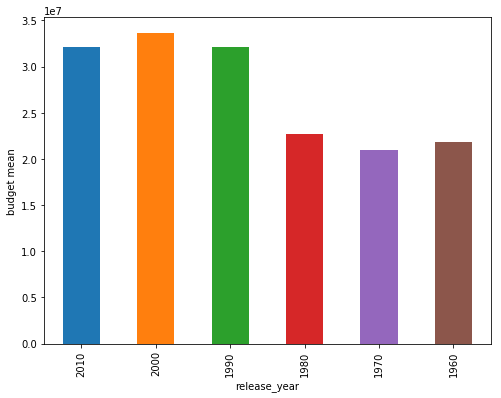

In [125]:
x = df_temp["release_year_group"]
y = df_temp['budget'].plot(kind='bar')
plt.xlabel("release_year")
plt.ylabel("budget mean")
plt.xticks(range(len(x)), x)
plt.show()

##### conclusion from above
##### there is a significent rise in Expenduature from 1980's to 1990's 

#### Question 2.2
#### Are new movies popular than old movies ?

In [126]:
df_temp = df.groupby(['release_year_group'], as_index=False)['popularity'].mean()
df_temp.sort_values(by=['release_year_group'],ascending=False,inplace=True)

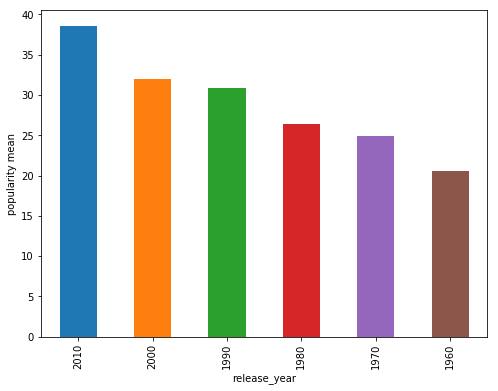

In [127]:
x = df_temp["release_year_group"]
y = df_temp['popularity'].plot(kind='bar')
plt.xlabel("release_year")
plt.ylabel("popularity mean")
plt.xticks(range(len(x)), x)
plt.show()

##### conclusion from above
##### New movies tend to be more popular 

#### Question 2.3
#### Is there any change in Runtime year wise ?

In [128]:
df_temp = df.groupby(['release_year_group'], as_index=False)['runtime'].mean()
df_temp.sort_values(by=['release_year_group'],ascending=False,inplace=True)

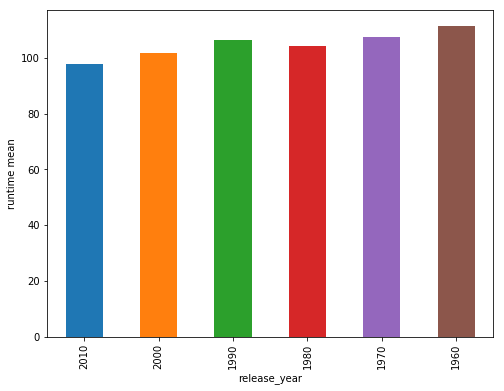

In [129]:
x = df_temp["release_year_group"]
y = df_temp['runtime'].plot(kind='bar')
plt.xlabel("release_year")
plt.ylabel("runtime mean")
plt.xticks(range(len(x)), x)
plt.show()

##### conclusion from above
##### New movies tend to be short then the old once

#### Question 2.4
#### Any Changes in total genres count year wise ? 

In [132]:
plt.rcParams["figure.figsize"] = (10,10)

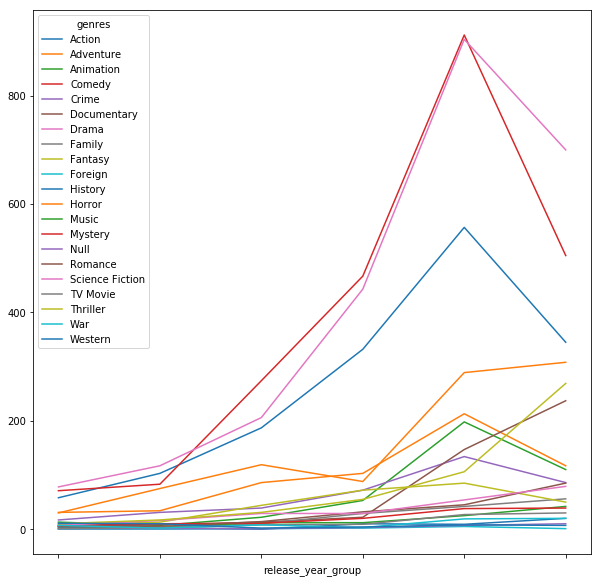

In [133]:
df_temp = df.groupby('release_year_group')['genres'].value_counts().unstack().fillna(0)
df_temp.plot()

##### conclusion from above
##### 1. Drama, Comedy and Action geners has significant increase over the years 
##### 2. From 1990's Adventure ,Thriller , Documentary, Horror and Animation  have a positive trend

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## limitations

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0